# Barnsley Fern
Michael Barnsley is a British mathematician and UW-Madison alumn who has studied fractals. His fern is a self-similar set that can be mathematically generated at any scale by iterating over a set of functions many times. This example reproduces the fern [as described on Wikipedia](https://en.wikipedia.org/wiki/Barnsley_fern), using some simple functions written in Python, and a random number generator from Numpy.

Additional fern designs can be found at:  
http://www.home.aone.net.au/~byzantium/ferns/fractal.html

#### import numpy and matplotlib, so we can view the fern

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# turn on plotting within the Notebook
% matplotlib inline 

### Import pre-defined parameters for the classic fern

In [2]:
df = pd.read_csv('data/barnsley.txt', delim_whitespace=True, index_col='w')
df.head()

a     b     c     d  e     f     p
w                                        
f1  0.00  0.00  0.00  0.16  0  0.00  0.01
f2  0.85  0.04 -0.04  0.85  0  1.60  0.85
f3  0.20 -0.26  0.23  0.22  0  1.60  0.07
f4 -0.15  0.28  0.26  0.24  0  0.44  0.07

In [3]:
df.a

w
f1    0.00
f2    0.85
f3    0.20
f4   -0.15
Name: a, dtype: float64

In [4]:
df.loc['f2']

a    0.85
b    0.04
c   -0.04
d    0.85
e    0.00
f    1.60
p    0.85
Name: f2, dtype: float64

## Make a transform function  
that implements this general formula

$f(x, y) = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} e \\ f \end{bmatrix}$ 

#### Inputs:
fern parameters $a$-$f$  
$x$ and $y$ vectors  
iteration number $n$  

#### Outputs:
fills $x$ and $y$ vectors  

In [5]:
def transform(x, y, n, a, b, c, d, e, f):
    x[n+1] = a * x[n] + b * y[n] + e
    y[n+1] = c * x[n] + d * y[n] + f

In [6]:
ni = 10 # number of iterations
x = np.zeros(ni) # vector of x-values, one for each iteration
y = np.zeros(ni) # vector of y values

In [7]:
df.loc['f2']

a    0.85
b    0.04
c   -0.04
d    0.85
e    0.00
f    1.60
p    0.85
Name: f2, dtype: float64

In [8]:
for i in range(9):
    transform(x, y, i, .85, .04, -.04, .85, 0, 1.6)
x, y

(array([ 0.        ,  0.        ,  0.064     ,  0.1728    ,  0.3114176 ,
         0.46828544,  0.63458776,  0.80371371,  0.97080831,  1.13240503]),
 array([ 0.        ,  1.6       ,  2.96      ,  4.11344   ,  5.089512  ,
         5.9136285 ,  6.6078528 ,  7.19129137,  7.68044912,  8.08954942]))

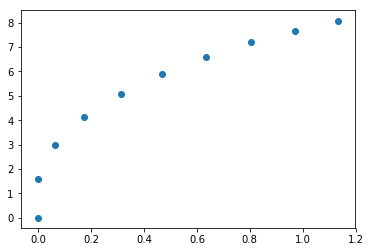

In [9]:
plt.scatter(x, y)

### Make another function to choose coefficients based on a transform key

In [10]:
def choose_transform(x, y, n, df, trans):
    t = df.loc[trans]
    transform(x, y, n, t.a, t.b, t.c, t.d, t.e, t.f)

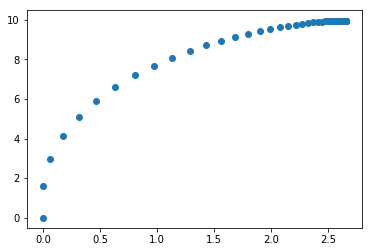

In [11]:
ni = 10000 # number of iterations
x = np.zeros(ni) # vector of x-values, one for each iteration
y = np.zeros(ni)
for i in range(ni-1):
    choose_transform(x, y, i, df, 'f2')
plt.scatter(x, y)

## Set up random selection of coefficients based on probabilities in `p` column
* the fern is constructed by four transform functions, which have different probabilities of being executed. For example, the second transform is chosen 85% of the time, while the first is only chosen 1% of the time.

#### The first step is to create a list of length 100, with values representing the transforms, proportional in number to the probability of the transform

In [12]:
transform_probs = df.p.to_dict()
transform_probs

{'f1': 0.01,
 'f2': 0.84999999999999998,
 'f3': 0.070000000000000007,
 'f4': 0.070000000000000007}

In [13]:
transforms = []
for k, v in transform_probs.items():
    transforms += [k] * int(100 * v)
print(transforms)

['f1', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f2', 'f3', 'f3', 'f3', 'f3', 'f3', 'f3', 'f3', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4']


#### We can then use the `numpy.random.choice()` method to randomly sample this list

In [14]:
for i in range(100):
    print(np.random.choice(transforms), end=' ')

f3 f2 f2 f2 f2 f2 f4 f3 f2 f2 f3 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f3 f4 f2 f2 f2 f2 f4 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f3 f2 f2 f2 f3 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f4 f2 f2 f2 f3 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f2 f4 f2 f2 f2 f2 f2 f2 f2 f2 f2 f4 f2 

## Apply the transforms

In [15]:
ni = 100000 # number of iterations
x = np.zeros(ni) # vector of x-values, one for each iteration
y = np.zeros(ni) # vector of y values

# for each iteration from n to ni-1
for n in range(ni-1):
    # draw a transform number
    trans = np.random.choice(transforms)
    # use the transform number to execute a transform from the dictionary made above
    choose_transform(x, y, n, df, trans)

## Make a scatter plot of the generated points

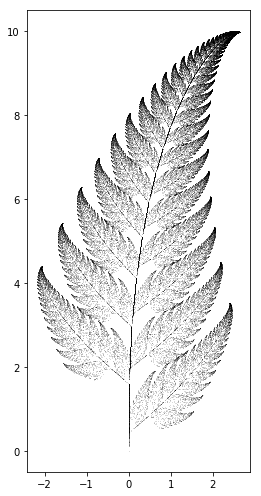

In [16]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.scatter(x, y, s=.1, c='k', lw=0)
ax.set_aspect(1)

### Generalize for use with any set of coefficients

In [17]:
def make_fern(df, ni=1e4):

    ni = int(ni)
    x = np.zeros(ni) # vector of x-values, one for each iteration
    y = np.zeros(ni) # vector of y values

    # set up random selection
    transform_probs = df.p.to_dict()
    transforms = []
    for k, v in transform_probs.items():
        transforms += [k] * int(100 * v)
    
    # for each iteration from n to ni-1
    for n in range(ni-1):
        # draw a transform number
        trans = np.random.choice(transforms)
        # use the transform number to execute a transform from the dictionary made above
        choose_transform(x, y, n, df, trans)
    fig, ax = plt.subplots(figsize=(11, 8.5))
    plt.scatter(x, y, s=.1, c='k', lw=0)
    ax.set_aspect(1)

In [18]:
df = pd.read_csv('data/Cyclosorus.txt', delim_whitespace=True, index_col='w')
df

a      b      c     d      e     f     p
w                                               
f1  0.000  0.000  0.000  0.25  0.000 -0.40  0.02
f2  0.950  0.005 -0.005  0.93 -0.002  0.50  0.84
f3  0.035 -0.200  0.160  0.04 -0.090  0.02  0.07
f4 -0.040  0.200  0.160  0.04  0.083  0.12  0.07

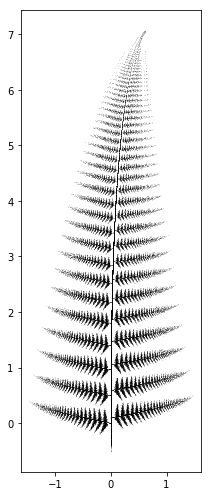

In [19]:
make_fern(df, 1e5)